# Классификация MNIST сверточной сетью

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import cv2
import numpy as np
from tensorflow import keras

In [3]:
train = np.loadtxt('F:/DS/Комьютерное зрение/day5/data/train.csv', delimiter=',', skiprows=1)
test = np.loadtxt('F:/DS/Комьютерное зрение/day5/data/test.csv', delimiter=',', skiprows=1)

In [4]:
# сохраняем разметку в отдельную переменную
train_label = train[:, 0]

# приводим размерность к удобному для обаботки виду
# добавляем размерность канала
train_img = np.resize(train[:, 1:], (train.shape[0], 28, 28, 1))
test_img = np.resize(test, (test.shape[0], 28, 28, 1))

## Визуализируем исходные данные

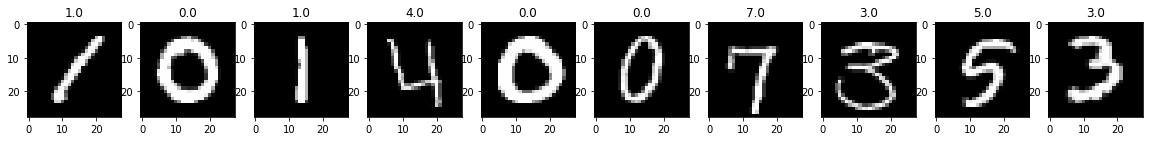

In [6]:
fig = plt.figure(figsize=(20, 10))
for i, img in enumerate(train_img[0:10, :], 1):
    subplot = fig.add_subplot(1, 10, i)
    plt.imshow(img[:,:,0], cmap='gray');
    subplot.set_title('%s' % train_label[i - 1]);

## Разбиваем выборку на обучение и валидацию

In [7]:
from sklearn.model_selection import train_test_split
y_train, y_val, x_train, x_val = train_test_split(
    train_label, train_img, test_size=0.2, random_state=42)

In [8]:
#задаем адам вручную с имзенеием параметров

In [9]:
from keras.optimizers import Adam


Using TensorFlow backend.


In [10]:
optimizer = Adam(lr=0.01)

## Собираем сверточную сеть для обучения

In [11]:
seed = 123457 #для воспроизводимости результата
kernek_initializer = keras.initializers.glorot_normal(seed=seed)#w нормальное респр(для Relud)
#bias_initializer = keras.initializers.normal(stddev=1., seed=seed) #b

model = keras.models.Sequential()

model.add(keras.layers.Conv2D(6, #кол-во коналов(матриц) на выходе #светрка в 2д мерном случии
                              kernel_size=(5, 5), 
                              padding='same', # сам задает пэддинг
                              activation='relu', # функция активации
                              input_shape=x_train.shape[1:], #входная размерность
                              bias_initializer=None, #баис, b
                              kernel_initializer=kernek_initializer)) # w

model.add(keras.layers.MaxPool2D(pool_size=(2, 2), padding='valid'))#макс пулинг, понижаем размерность

model.add(keras.layers.Conv2D(16, 
                              kernel_size=(5, 5),
                              padding='valid',
                              activation='relu', 
                              bias_initializer=None,
                              kernel_initializer=kernek_initializer))

model.add(keras.layers.MaxPool2D(pool_size=(2, 2), padding='valid'))

model.add(keras.layers.Flatten()) #объеденияет матрицы в большой вектор
#передаем вектор в полносвязные слои(Dense)
model.add(keras.layers.Dense(32, activation='relu',
                             bias_initializer=None,
                             kernel_initializer=kernek_initializer))
#на последнем слое кол-во выходов должно соответствовать кол-ву классов и исп spftmax
model.add(keras.layers.Dense(10, activation='softmax',
                             bias_initializer=None,
                             kernel_initializer=kernek_initializer))
#компиляция 
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


## Выводим информацию о модели

In [12]:
model.summary() #5*5*6+6=156

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 6)         156       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 10, 10, 16)        2416      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 16)          0         
_________________________________________________________________
flatten (Flatten)            (None, 400)               0         
_________________________________________________________________
dense (Dense)                (None, 32)                12832     
_________________________________________________________________
dense_1 (Dense)              (None, 10)                3

## One hot encoding разметки

In [13]:
y_train_labels = keras.utils.to_categorical(y_train)

In [14]:
y_train[:10]

array([6., 5., 3., 4., 7., 8., 6., 7., 0., 9.])

In [15]:
y_train_labels[:10]

array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)

## Запускаем обучение

In [16]:
model.fit(x_train, 
          y_train_labels,
          batch_size=32, #размер выборки(32 изображения 2^x)
          epochs=10, #кол-во эпох
          validation_split=0.2)

Train on 26880 samples, validate on 6720 samples
Epoch 1/10
26880/26880 [==============================] - 8s 310us/sample - loss: 0.8783 - acc: 0.7837 - val_loss: 0.2303 - val_acc: 0.9345
Epoch 2/10
26880/26880 [==============================] - 8s 302us/sample - loss: 0.1638 - acc: 0.9528 - val_loss: 0.1454 - val_acc: 0.9600
Epoch 3/10
26880/26880 [==============================] - 8s 301us/sample - loss: 0.1012 - acc: 0.9695 - val_loss: 0.1364 - val_acc: 0.9625
Epoch 4/10
26880/26880 [==============================] - 8s 299us/sample - loss: 0.0774 - acc: 0.9764 - val_loss: 0.1127 - val_acc: 0.9688
Epoch 5/10
26880/26880 [==============================] - 9s 317us/sample - loss: 0.0628 - acc: 0.9807 - val_loss: 0.1336 - val_acc: 0.9662
Epoch 6/10
26880/26880 [==============================] - 9s 317us/sample - loss: 0.0572 - acc: 0.9825 - val_loss: 0.1090 - val_acc: 0.9744
Epoch 7/10
26880/26880 [==============================] - 8s 316us/sample - loss: 0.0543 - acc: 0.9830 - val_lo

## Предсказываем класс объекта

In [17]:
pred_val = model.predict_classes(x_val)

In [18]:
pred_val[:10]

array([8, 1, 9, 9, 8, 6, 2, 2, 7, 1], dtype=int64)

## Оцениваем качество решение на валидационной выборке

In [19]:
from sklearn.metrics import accuracy_score
print('Accuracy: %s' % accuracy_score(y_val, pred_val))

Accuracy: 0.975


In [20]:
from sklearn.metrics import classification_report
print(classification_report(y_val, pred_val))

              precision    recall  f1-score   support

         0.0       0.98      0.99      0.99       816
         1.0       0.99      0.99      0.99       909
         2.0       0.97      0.97      0.97       846
         3.0       1.00      0.94      0.97       937
         4.0       0.97      0.98      0.97       839
         5.0       0.96      0.98      0.97       702
         6.0       0.99      0.98      0.99       785
         7.0       0.96      0.98      0.97       893
         8.0       0.98      0.95      0.96       835
         9.0       0.95      0.98      0.97       838

    accuracy                           0.97      8400
   macro avg       0.97      0.98      0.98      8400
weighted avg       0.98      0.97      0.97      8400



In [21]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_val, pred_val))

[[810   0   1   0   0   0   1   0   0   4]
 [  0 903   2   0   1   0   1   2   0   0]
 [  1   4 819   0   5   0   1   8   6   2]
 [  1   0   9 882   0  14   1  15   7   8]
 [  1   0   0   0 821   0   2   2   1  12]
 [  2   0   0   2   1 691   3   1   0   2]
 [  4   1   0   0   5   1 773   0   1   0]
 [  0   1  11   0   0   0   0 874   2   5]
 [  4   3   4   0   8   9   2   3 793   9]
 [  2   1   0   0   5   2   0   2   2 824]]


## Предсказания на тестовыйх данных

In [22]:
pred_test = model.predict_classes(test_img)

## Визуализируем предсказания

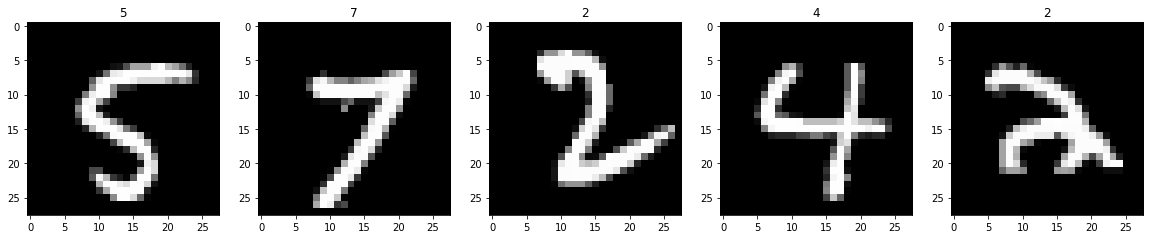

In [23]:
fig = plt.figure(figsize=(20, 10))
indices = np.random.choice(range(len(test_img)), 5)
img_prediction = zip(test_img[indices], pred_test[indices])
for i, (img, pred) in enumerate(img_prediction, 1):
    subplot = fig.add_subplot(1, 5, i)
    plt.imshow(img[...,0], cmap='gray');
    subplot.set_title('%d' % pred);

## Готовим файл для отправки

In [34]:
with open('submit.txt', 'w') as dst:
    dst.write('ImageId,Label\n')
    for i, p in enumerate(pred_test, 1):
        dst.write('%s,%d\n' % (i, p))

In [ ]:
# Your submission scored 0.96814